In [ ]:
# Team 3
# Anirban Mukherjee
# Manjusha Chava
# Tae Hyun Je  
# DATE

In [62]:
# importing comms libraries
import numpy as np
import scipy as spy
import scipy.interpolate
import matplotlib.pyplot as plt
import math
from playsoundimport playsound
from scipy.io import wavfile


In [66]:
# Define parameters for Project3
L = 100  # Length of the overall transmission
N = 10   # Pulse duration for rectangular pulse train
M = 10   # Upsampling factor for generating analog waveform
L_lc = 20 # Line coding pulse duration

In [67]:
# Matlab's interp function
def interpolate_1d_vector(vector, factor):
    """
    Interpolate, i.e. upsample, a given 1D vector by a specific interpolation factor.
    :param vector: 1D data vector
    :param factor: factor for interpolation (must be integer)
    :return: interpolated 1D vector by a given factor
    """
    x = np.arange(np.size(vector))
    y = vector
    f = scipy.interpolate.interp1d(x, y, kind='cubic')

    x_extended_by_factor = np.linspace(x[0], x[-1], np.size(x) * factor)
    y_interpolated = np.zeros(np.size(x_extended_by_factor))

    i = 0
    for x in x_extended_by_factor:
        y_interpolated[i] = f(x)
        i += 1

    return y_interpolated

In [68]:
# Matlab's quantiz function
def quantize(signal, partitions, codebook):
    indices = []
    quanta = []
    for datum in signal:
        index = 0
        while index < len(partitions) and datum > partitions[index]:
            index += 1
        indices.append(index)
        quanta.append(codebook[index])
    return indices, quanta

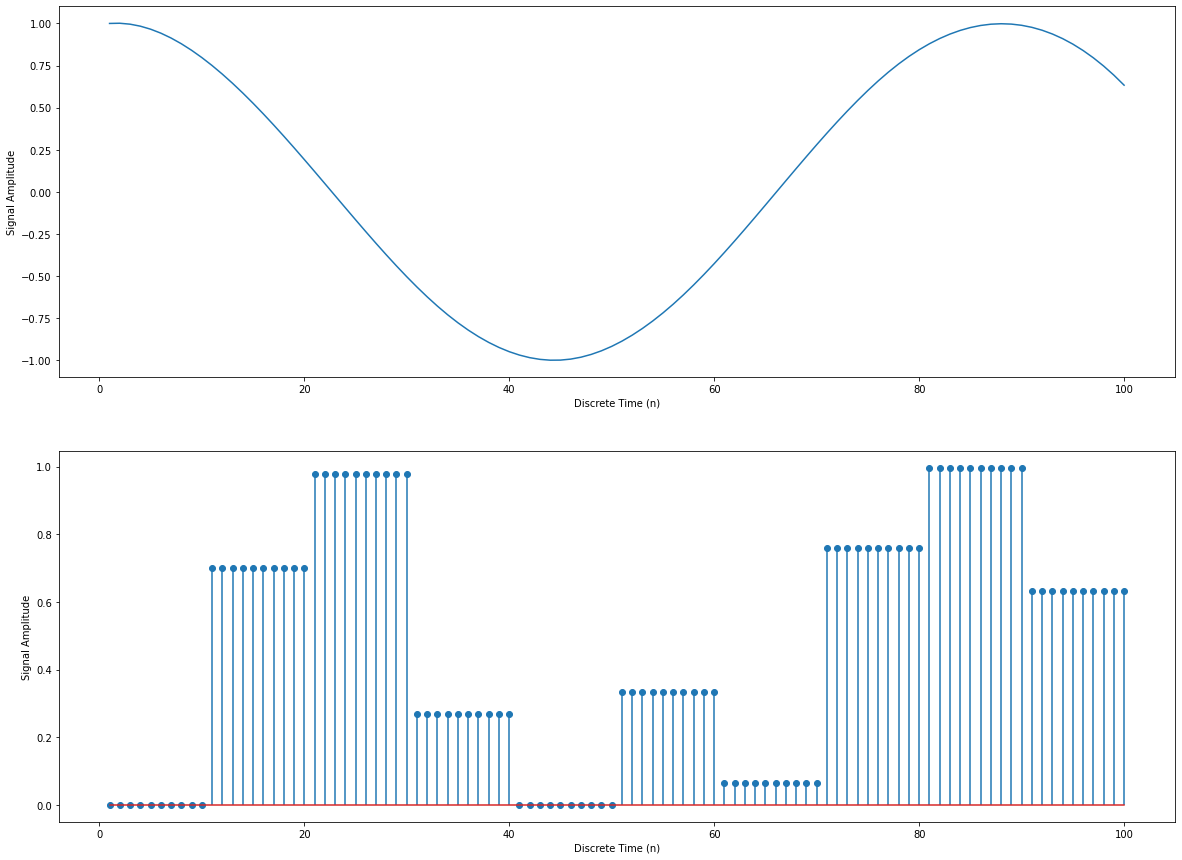

In [143]:
# Question 1

freq1 = 150
freq2 = 500
freq3 = 44100

cos1 = []
cos2 = []
cos3 = []

for i in range(N): 
    cos1.append(np.cos(freq1 * i))
    cos2.append(np.cos(freq2 * i))
    cos3.append(np.cos(freq3 * i))

analog_wavefm_50 = interpolate_1d_vector(cos1,N) 
analog_wavefm_500 = interpolate_1d_vector(cos2,N) 
analog_wavefm_44100 = interpolate_1d_vector(cos3,N) 

# Generate a rectangular pulse train of samples
impulsetrain_wavefm = np.reshape(np.ones((N,1))*np.remainder(cos1,1),(1,L), order='F')

impulsetrain_wavefm_500 = np.reshape(np.ones((N,1))*np.remainder(cos2,1),(1,L), order='F')

impulsetrain_wavefm_44100 = np.reshape(np.ones((N,1))*np.remainder(cos2,1),(1,L), order='F')

# Visualize

plt.figure(figsize=(20, 15))

plt.subplot(211)
plt.plot(np.arange(1,L+1),analog_wavefm_50)
plt.xlabel('Discrete Time (n)')
plt.ylabel('Signal Amplitude')
plt.subplot(212)
plt.stem(np.arange(1,L+1),impulsetrain_wavefm.T)
plt.xlabel('Discrete Time (n)')
plt.ylabel('Signal Amplitude')
plt.show()


# plt.subplot(211)
# plt.plot(np.arange(1,L+1), analog_wavefm_500)
# plt.xlabel('Discrete Time (n)')
# plt.ylabel('Signal Amplitude')

# plt.subplot(211)
# plt.plot(np.arange(1,L+1), analog_wavefm_44100)
# plt.xlabel('Discrete Time (n)')
# plt.ylabel('Signal Amplitude')
# plt.show()


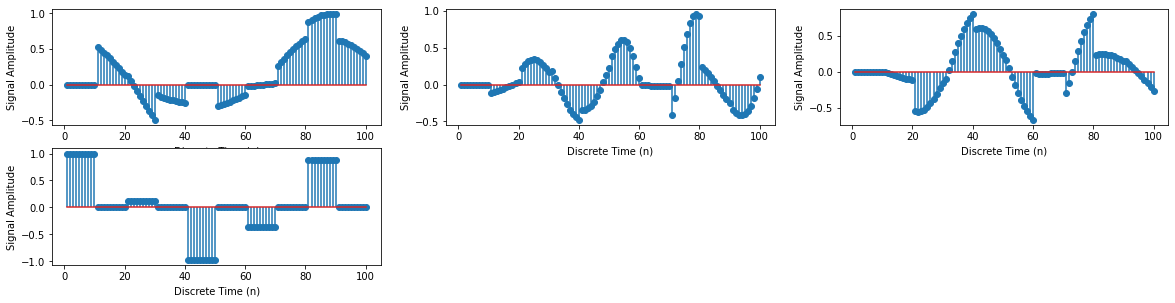

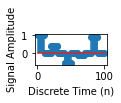

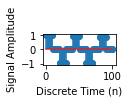

In [157]:
# Question 2
# Pulse Amplitude Modulation 


# Natural Sampling PAM
nspam_wavefm_150 = np.multiply(impulsetrain_wavefm, analog_wavefm_50).T

nspam_wavefm_500 = np.multiply(impulsetrain_wavefm_500, analog_wavefm_500).T

nspam_wavefm_44100 = np.multiply(impulsetrain_wavefm_44100, analog_wavefm_44100).T

# Flat-Top PAM

#downsampling
temp1 = analog_wavefm_50[0::2*N]
temp_500_1 = analog_wavefm_500[0::2*N]
temp_44100_1 = analog_wavefm_44100[0::2*N]

# variables for upsampling
temp2 = (int)(N/2)
temp3 = N

# upsampling for 150 Hz
temp = np.zeros((temp3,))
temp[::2] = temp1

# upsampling for 500 Hz
temp_500 = np.zeros((temp3,))
temp_500[::2] = temp_500_1

# upsampling for 44100 Hz
temp_44100 = np.zeros((temp3,))
temp_44100[::2] = temp_44100_1

# pam_wavefm for 150 Hz
ftpam_wavefm = np.reshape(np.ones((N,1))*temp,(1,L), order='F')

# pam_wavefm for 500 Hz
ftpam_wavefm_500 = np.reshape(np.ones((N,1))*temp_500,(1,L), order='F')

# pam_wavefm for 44100 Hz
ftpam_wavefm_44100 = np.reshape(np.ones((N,1))*temp_44100,(1,L), order='F')


# Visualize

plt.figure(figsize=(20, 15))

plt.subplot(631)
plt.stem(np.arange(1,L+1),nspam_wavefm_150)
plt.xlabel('Discrete Time (n)')
plt.ylabel('Signal Amplitude')

plt.subplot(632)
plt.stem(np.arange(1,L+1),nspam_wavefm_500)
plt.xlabel('Discrete Time (n)')
plt.ylabel('Signal Amplitude')

plt.subplot(633)
plt.stem(np.arange(1,L+1),nspam_wavefm_44100)
plt.xlabel('Discrete Time (n)')
plt.ylabel('Signal Amplitude')


plt.subplot(634)
plt.stem(np.arange(1,L+1),ftpam_wavefm.T)
plt.xlabel('Discrete Time (n)')
plt.ylabel('Signal Amplitude')
plt.show()

plt.subplot(641)
plt.stem(np.arange(1,L+1),ftpam_wavefm_500.T)
plt.xlabel('Discrete Time (n)')
plt.ylabel('Signal Amplitude')
plt.show()

plt.subplot(642)
plt.stem(np.arange(1,L+1),ftpam_wavefm_44100.T)
plt.xlabel('Discrete Time (n)')
plt.ylabel('Signal Amplitude')
plt.show()




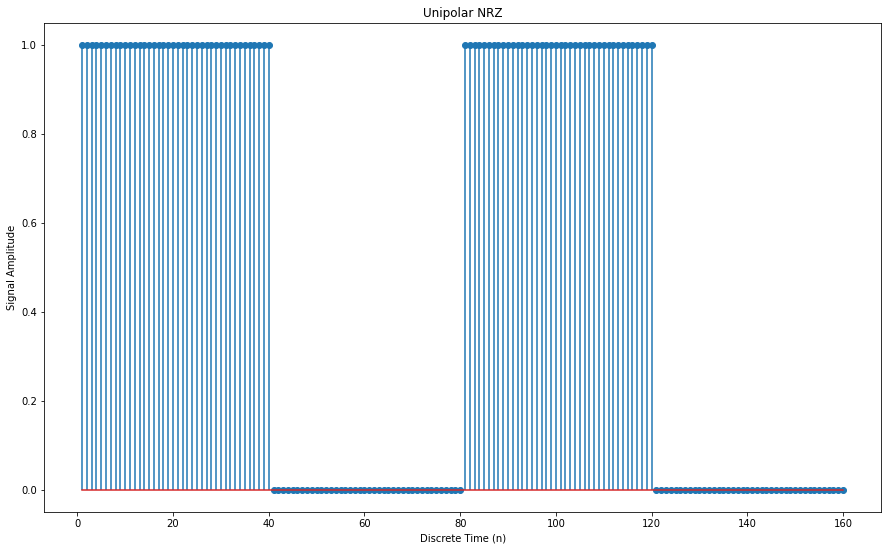

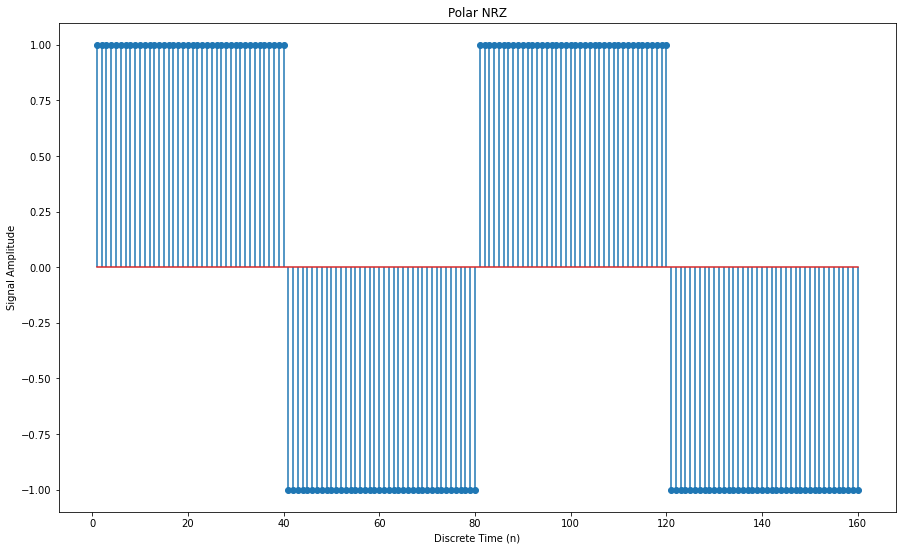

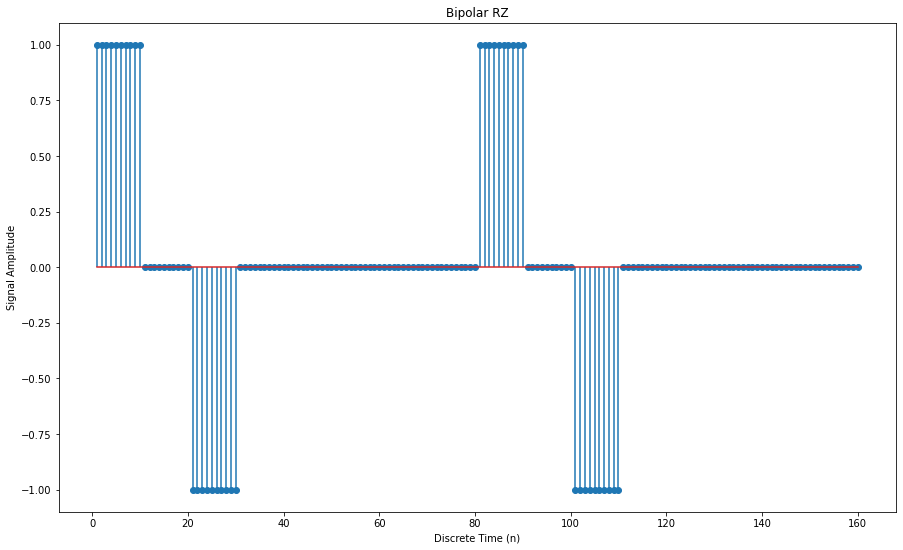

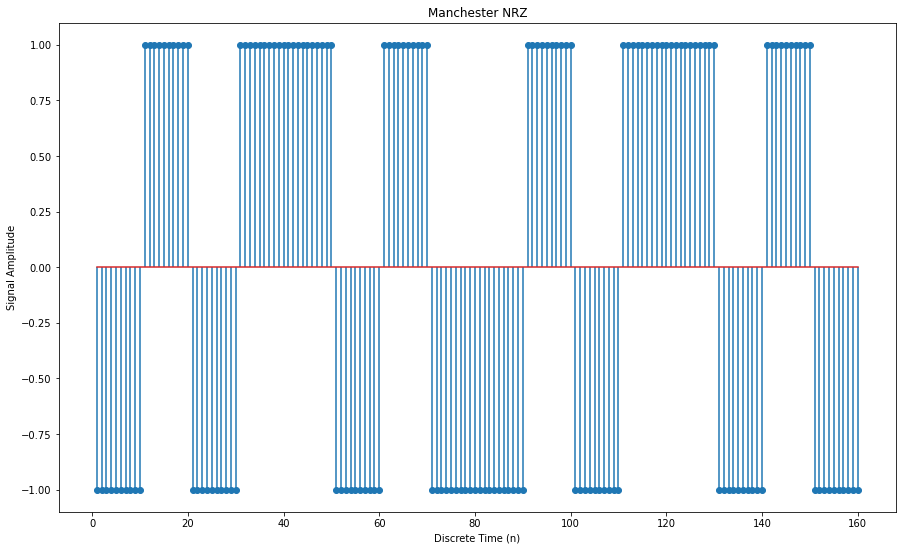

In [69]:
# Generate your own line codes for the binary string `11001100' 
bin_str = [1,1,0,0,1,1,0,0]
# Unipolar NRZ
upnrz1 = np.ones((1,L_lc))
upnrz0 = np.zeros((1,L_lc))
upnrz_wavefm = list()
bpflag = 0
for ind in range(0,len(bin_str)):
    if (bin_str[ind] == 1):
        upnrz_wavefm.append(upnrz1.flatten())
    else:
        upnrz_wavefm.append(upnrz0.flatten())
#Polar NRZ
pnrz1 = np.ones((1,L_lc))
pnrz0int = np.ones((1,L_lc))
pnrz0 = np.negative(pnrz0int)
pnrz_wavefm = list()
bpflag = 0
for ind in range(0,len(bin_str)):
    if (bin_str[ind] == 1):
        pnrz_wavefm.append(pnrz1.flatten())
    else:
        pnrz_wavefm.append(pnrz0.flatten())
#Bipolar RZ
bprz1 = np.zeros((1,L_lc))
bprz2 = np.zeros((1,L_lc))
for i in range(0, len(bprz1[0])):
    if i < len(bprz1[0])/2:
        bprz1[0][i] = 1
for i in range(0, len(bprz2[0])):
    if i < 2*len(bprz2[0])/4:
        bprz2[0][i] = -1
bprz0 = np.zeros((1,L_lc))
bprz_wavefm = list()
bpflag = 0
# Bipolar RZ
for ind in range(0,len(bin_str)):
    if (bin_str[ind] == 1 and bin_str[ind -1] ==1):
        bprz_wavefm.append(bprz2.flatten())
    elif (bin_str[ind] == 1):
        bprz_wavefm.append(bprz1.flatten())
    else:
        bprz_wavefm.append(bprz0.flatten())
#Manchester NRZ
# if 1, 1111, -1-1-1-1
# if 0, -1-1-1-1, 1111
manrz1 = np.ones((1,L_lc))
for i in range(0, len(manrz1[0])):
    if i < len(manrz1[0])/2:
        manrz1[0][i] = -1
manrz0 = np.ones((1,L_lc))
for i in range(0, len(manrz0[0])):
    if len(manrz0[0])/2 <= i < len(manrz0[0]):
        manrz0[0][i] = -1
manrz_wavefm = list()
bpflag = 0
# Manchester NRZ
for ind in range(0,len(bin_str)):
    if (bin_str[ind] == 1):
        manrz_wavefm.append(manrz1.flatten())
    else:
        manrz_wavefm.append(manrz0.flatten())
# Visualize Unipolar NRZ
plt.figure(figsize=(15, 9))
plt.stem(np.arange(1,L_lc*len(bin_str)+1),np.array(upnrz_wavefm).flatten())
plt.title('Unipolar NRZ')
plt.xlabel('Discrete Time (n)')
plt.ylabel('Signal Amplitude')
plt.show()
# Visualize Polar NRZ
plt.figure(figsize=(15, 9))
plt.stem(np.arange(1,L_lc*len(bin_str)+1),np.array(pnrz_wavefm).flatten())
plt.title('Polar NRZ')
plt.xlabel('Discrete Time (n)')
plt.ylabel('Signal Amplitude')
plt.show()
# Visualize Bipolar RZ
plt.figure(figsize=(15, 9))
plt.stem(np.arange(1,L_lc*len(bin_str)+1),np.array(bprz_wavefm).flatten())
plt.title('Bipolar RZ')
plt.xlabel('Discrete Time (n)')
plt.ylabel('Signal Amplitude')
plt.show()
# Visualize Manchester NRZ
plt.figure(figsize=(15, 9))
plt.stem(np.arange(1,L_lc*len(bin_str)+1),np.array(manrz_wavefm).flatten())
plt.title('Manchester NRZ')
plt.xlabel('Discrete Time (n)')
plt.ylabel('Signal Amplitude')
plt.show()

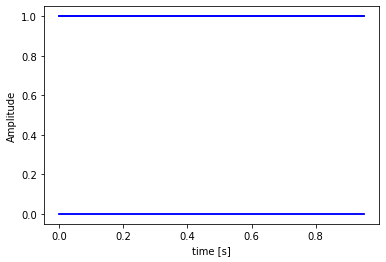

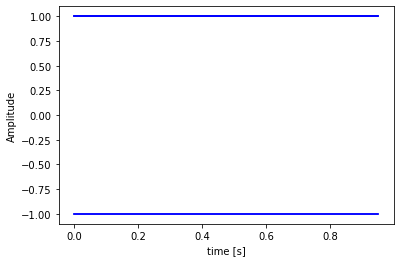

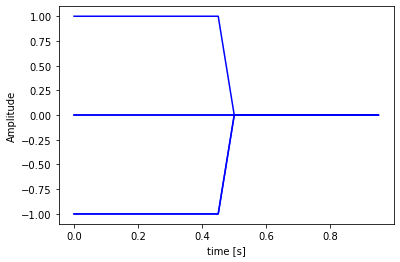

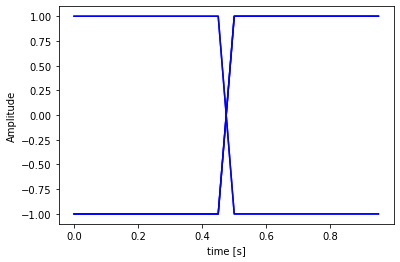

In [74]:
rand_bin_str = np.around(np.random.random((1,L))).flatten()
## Unipolar-waveform
new_upnrz_wavefm = []
for ind in range(0, len(rand_bin_str)):
    if (rand_bin_str[ind] == 1):
        new_upnrz_wavefm.append(upnrz1.flatten())
    else:
        new_upnrz_wavefm.append(upnrz0.flatten())
sig_upnrz = np.array(new_upnrz_wavefm).flatten()
M = 100
N=20
t = np.linspace(0.0, ((N-1)/N), N)
# Plot eye diagram
for p in range(int(M/N)):
    plt.plot(t,sig_upnrz[p*N+np.arange(N)],'b-')
plt.ylabel('Amplitude')
plt.xlabel('time [s]')
plt.show()
## Polar-waveform
new_pnrz_wavefm = []
for ind in range(0, len(rand_bin_str)):
    if (rand_bin_str[ind] == 1):
        new_pnrz_wavefm.append(pnrz1.flatten())
    else:
        new_pnrz_wavefm.append(pnrz0.flatten())
sig_pnrz = np.array(new_pnrz_wavefm).flatten()
M = 100
N=20
t = np.linspace(0.0, ((N-1)/N), N)
# Plot eye diagram
for p in range(int(M/N)):
    plt.plot(t,sig_pnrz[p*N+np.arange(N)],'b-')
plt.ylabel('Amplitude')
plt.xlabel('time [s]')
plt.show()
## Bipolar-waveform
new_bprz_wavefm = []
for ind in range(0, len(rand_bin_str)):
    if (rand_bin_str[ind] == 1 and rand_bin_str[ind -1] ==1):
        new_bprz_wavefm.append(bprz2.flatten())
    elif (rand_bin_str[ind] == 1):
        new_bprz_wavefm.append(bprz1.flatten())
    else:
        new_bprz_wavefm.append(bprz0.flatten())
sig_bprz = np.array(new_bprz_wavefm).flatten()
M = 100
N=20
t = np.linspace(0.0, ((N-1)/N), N)
# Plot eye diagram
for p in range(int(M/N)):
    plt.plot(t,sig_bprz[p*N+np.arange(N)],'b-')
plt.ylabel('Amplitude')
plt.xlabel('time [s]')
plt.show()
# Manchester Waveform
new_manrz_wavefm = []
for ind in range(0, len(rand_bin_str)):
    if (rand_bin_str[ind] == 1):
        new_manrz_wavefm.append(manrz1.flatten())
    else:
        new_manrz_wavefm.append(manrz0.flatten())
sig_manrz = np.array(new_manrz_wavefm).flatten()
M = 100
N=20
t = np.linspace(0.0, ((N-1)/N), N)
# Plot eye diagram
for p in range(int(M/N)):
    plt.plot(t,sig_manrz[p*N+np.arange(N)],'b-')
plt.ylabel('Amplitude')
plt.xlabel('time [s]')
plt.show()

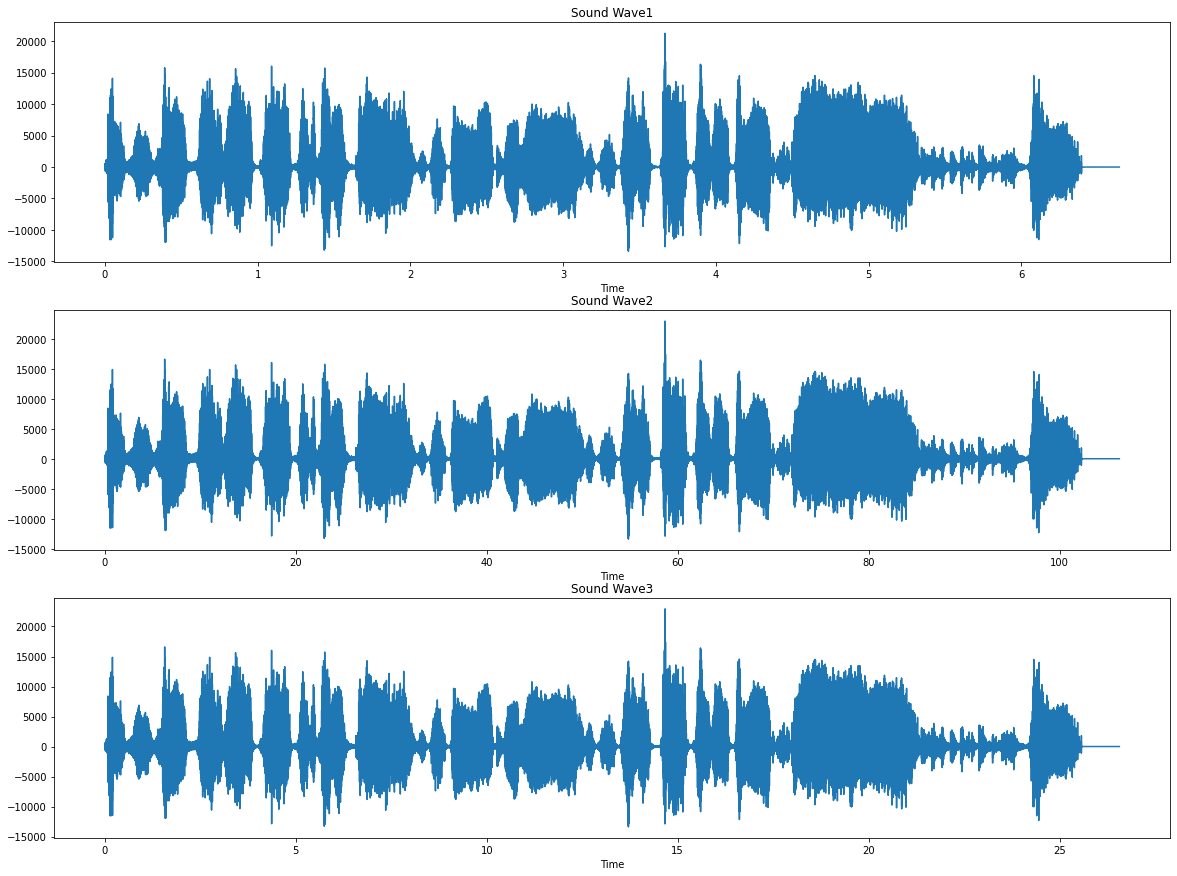

In [73]:

# Question 6
# 
# IT'S FROM SPONGEBOB SQUAREPANTS....
# https://www.youtube.com/watch?v=d1Z8Hz7M04A
#

raw = wave.open("mystery_1.wav")
signal = raw.readframes(-1) 
signal = np.frombuffer(signal, dtype ="int16") 
f_rate = raw.getframerate()
time = np.linspace(0,len(signal) / f_rate, num = len(signal))
raw.close()

raw2 = wave.open("mystery_2.wav")
signal2 = raw2.readframes(-1)
signal2 = np.frombuffer(signal2, dtype="int16")
f_rate2 = raw2.getframerate()
time2 = np.linspace(0, len(signal2) / f_rate2, num = len(signal2))
raw2.close()

raw3 = wave.open("mystery_3.wav")
signal3 = raw3.readframes(-1)
signal3 = np.frombuffer(signal2, dtype="int16")
f_rate3 = raw3.getframerate()
time3 = np.linspace(0, len(signal3) / f_rate3 , num = len(signal3))
raw3.close()

plt.figure(figsize=(20, 15))
plt.subplot(311)
plt.title("Sound Wave1") 
plt.xlabel("Time") 
plt.plot(time, signal) 

plt.subplot(312)
plt.title("Sound Wave2") 
plt.xlabel("Time") 
plt.plot(time2, signal2) 

plt.subplot(313)
plt.title("Sound Wave3") 
plt.xlabel("Time") 
plt.plot(time3, signal3) 


plt.show()